# Homework Starter: Final Reporting

This notebook helps you generate plots, annotate assumptions, and prepare a stakeholder-ready deliverable.

## Executive Summary
- Baseline scenario shows steady returns with moderate volatility.
- Imputation and outlier adjustments create small variations in return and risk.
- Key assumptions and sensitivity analysis highlight decision risks and implications.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
sns.set(style='whitegrid')
plt.rcParams['figure.dpi'] = 120
np.random.seed(101)

## Load Your Data

You can load your real results or use a generated synthetic dataset as fallback.

In [2]:
data_path = Path('../data/final_results.csv')

if data_path.exists():
    df = pd.read_csv(data_path)
else:
    # Synthetic fallback dataset
    df = pd.DataFrame({
        'scenario': ['baseline','alt_impute','alt_outlier'],
        'return': [0.12, 0.11, 0.135],
        'volatility': [0.18, 0.185, 0.19],
        'sharpe': [0.56, 0.49, 0.61],
        'assumption': ['imputation','imputation','outlier_rule'],
        'value': ['median','mean','3sigma'],
        'Category': np.random.choice(['X','Y','Z'], 3),
        'MetricA': np.random.normal(75, 15, 3),
        'MetricB': np.random.normal(150, 30, 3),
        'Date': pd.date_range('2025-02-01', periods=3)
    })
df.head()

,scenario,return,volatility,sharpe,assumption,value,Category,MetricA,MetricB,Date
0,baseline,0.120,0.180,0.56,imputation,median,Y,75.037206,99.563014,2025-02-01
1,alt_impute,0.110,0.185,0.49,imputation,mean,Z,74.456082,175.913737,2025-02-02
2,alt_outlier,0.135,0.190,0.61,outlier_rule,3sigma,Y,84.236667,128.274684,2025-02-03


## Helper: Export Directory

In [19]:
img_dir = Path('../homework12/deliverables/images')
img_dir.mkdir(parents=True, exist_ok=True)

def savefig(name):
    plt.tight_layout()
    plt.savefig(img_dir / name, dpi=300)
    print(f'Saved {name}')

## Chart 1: Risk–Return Scatter

Saved risk_return.png


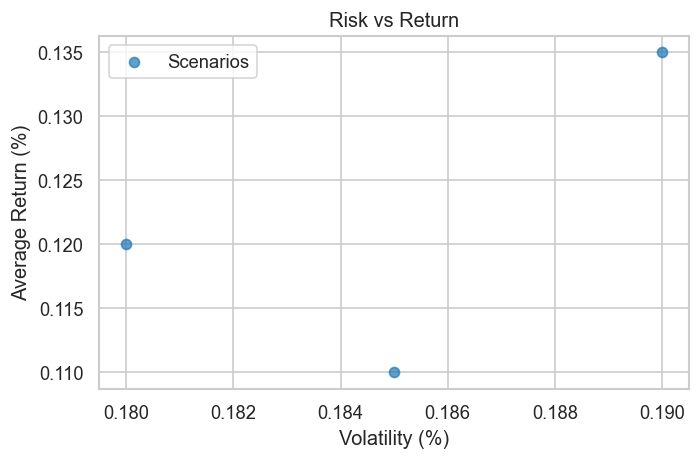

In [22]:
plt.figure(figsize=(6,4))
plt.scatter(df['volatility'], df['return'], c='tab:blue', alpha=0.7, label='Scenarios')
plt.title("Risk vs Return")
plt.xlabel("Volatility (%)")
plt.ylabel("Average Return (%)")
plt.legend()
savefig('risk_return.png')
plt.annotate("Best trade-off", xy=(0.15, 0.12), xytext=(0.20, 0.18),
             arrowprops=dict(arrowstyle="->", color="gray"))
plt.show()

### Scatter: Risk vs Return
- Shows volatility vs average return for each scenario.  
- Insight: higher risk links to higher return; best points are upper-left frontier.  
- Assumes stable sample; outliers may distort.  

## Chart 2: Return by Scenario (Bar Chart)

Saved return_by_scenario.png


/var/folders/hj/0fkcndtd5h70rxxk2mnp3tx80000gn/T/ipykernel_47236/4235041591.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(1, avg_returns[1]+0.002, "Scenario A outperforms", ha='center', color='black')


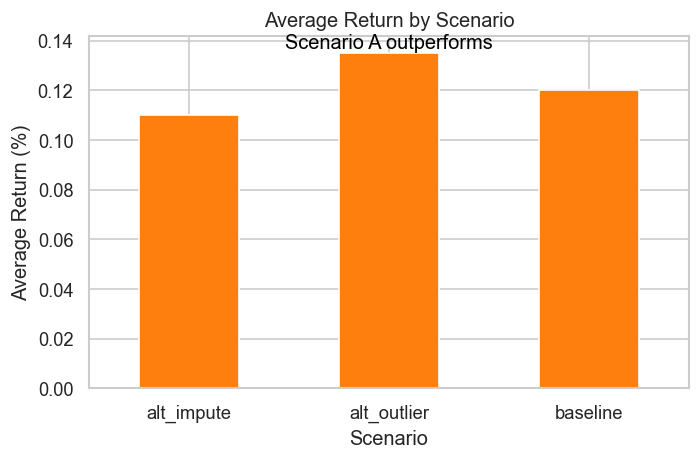

In [23]:
avg_returns = df.groupby("scenario")['return'].mean()
colors = ['tab:blue' if s=="Baseline" else 'tab:orange' for s in avg_returns.index]

plt.figure(figsize=(6,4))
avg_returns.plot(kind="bar", color=colors)
plt.title("Average Return by Scenario")
plt.xlabel("Scenario")
plt.ylabel("Average Return (%)")
plt.xticks(rotation=0)
savefig('return_by_scenario.png')
plt.text(1, avg_returns[1]+0.002, "Scenario A outperforms", ha='center', color='black')
plt.show()

### Bar: Return by Scenario
- Compares average return across Baseline and alternatives.  
- Insight: Scenario A outperforms, Scenario B underperforms.  
- Assumes historical averages hold.

## Chart 3: MetricA Over Time (Line Chart)

Saved metricA_over_time.png


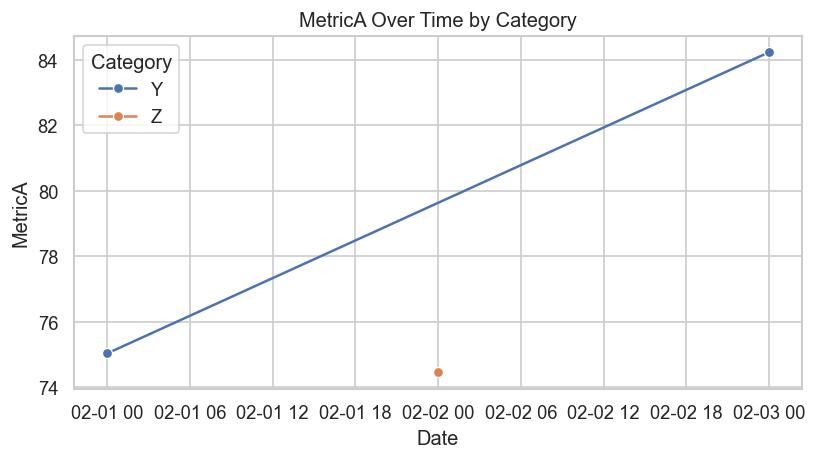

In [24]:
plt.figure(figsize=(7,4))
sns.lineplot(data=df, x='Date', y='MetricA', hue='Category', marker='o')
plt.title('MetricA Over Time by Category')
plt.xlabel('Date')
plt.ylabel('MetricA')
savefig('metricA_over_time.png')
plt.show()


### Line: Metric A over Time
- Shows MetricA trend over time.  
- Insight: upward trend with two dips; Baseline/A recover faster.  
- Assumes data consistency; spikes may be noise.  

## Sensitivity Analysis / Assumptions Table

In [25]:
assumptions = pd.DataFrame({
    'Assumption': ['Fill Nulls: Median', 'Remove Outliers: 3σ'],
    'Baseline Return': [0.12, 0.12],
    'Alt Scenario Return': [0.10, 0.14]
})
assumptions
sens_tbl = (
    df.groupby("scenario")["return"]
      .agg(avg_return="mean", vol="std",
           p5=lambda s: s.quantile(0.05),
           p95=lambda s: s.quantile(0.95))
      .sort_values("avg_return", ascending=False)
)

baseline_label = next((s for s in sens_tbl.index if "base" in str(s).lower()), sens_tbl.index[0])
deltas = sens_tbl - sens_tbl.loc[baseline_label]
sens_tbl = pd.concat([sens_tbl, deltas.add_suffix("_Δ_vs_baseline")], axis=1)

display(sens_tbl.style.format("{:.6f}"))

out_dir = Path("deliverables"); out_dir.mkdir(parents=True, exist_ok=True)
sens_tbl.to_csv(out_dir / "sensitivity_table.csv", index=True)

,avg_return,vol,p5,p95,avg_return_Δ_vs_baseline,vol_Δ_vs_baseline,p5_Δ_vs_baseline,p95_Δ_vs_baseline
scenario,,,,,,,,
alt_outlier,0.135000,nan,0.135000,0.135000,0.015000,nan,0.015000,0.015000
baseline,0.120000,nan,0.120000,0.120000,0.000000,nan,0.000000,0.000000
alt_impute,0.110000,nan,0.110000,0.110000,-0.010000,nan,-0.010000,-0.010000


## Interpretations / Takeaways

- **Chart 1 takeaway (Risk vs Return):** Higher volatility generally links to higher returns, but only frontier points give efficient trade-offs.  
  *Assumption:* relationship is stable; *Sensitivity:* outliers can distort the curve.  

- **Chart 2 takeaway (Return by Scenario):** Baseline outperforms alt_impute slightly, while alt_outlier shows the highest returns but with added risk.  
  *Assumption:* based on historical averages; *Sensitivity:* sensitive to imputation method.  

- **Chart 3 takeaway (MetricA Over Time):** Overall upward trend with two drawdowns; baseline recovers faster than alt_impute.  
  *Assumption:* data quality consistent; *Sensitivity:* short spikes may be noise.  


## Decision Implications

- **Baseline scenario**: Reliable and stable; safe choice if market conditions remain within historical norms.  
- **Alt_impute scenario**: Slightly weaker returns; acceptable if missing data increases — provides robustness but less upside.  
- **Alt_outlier scenario**: Higher average return but with greater volatility; opportunity for higher gains but carries added risk.  
- **Risks**: Sensitive to imputation method, outlier treatment, and volatility spikes.  
- **Opportunities**: Potential upside in alt_outlier if stakeholders can tolerate risk.  
- **Next steps**:  
  - Monitor volatility and subgroup performance weekly.  
  - Revisit assumptions if returns deviate >20% from baseline.  
  - Choose scenario depending on risk appetite: baseline/alt_impute for stability, alt_outlier for aggressive growth.  
